## Caso grupal 1:  Implementación de un filtro espacial o morfológico
#### Grupo 18 Equipo 9: Miembros
Alberto Rodríguez Álvarez  
Andrés Molares Ulloa  
Mario García Mayo  
Xavier Castilla Carbonell

#### Descripción del problema
En esta práctica se busca detectar y delimitar los cuerpos estelares presentes en una imagen del espacio tomada desde la superficie terrestre.

#### Solución planteada
Se plantea como posible solución el uso de operadores morfológicos sobre la imagen umbralizada, con el fin de obtener imagenes más limpias y con los elementos facilmente reconocibles. Siendo la apertura la operación morfológica que se estima devolverá mejores resultados, por ser una operación orientada a la eliminación de ruido de fondo. La función planteada podrá, mediante la selección de parámetros, ajustarse a cada imagen. Esta parametrización de la función también permite variar el número de cuerpos celestes devueltos en vase a su tamaño e intensidad, al poder ajustar el elemento estructural tanto en forma como en dimensiones asi como el número de iteraciones.

#### Desarrollo del ejecicio

##### 1 Módulos
Carga de los modulos usados durante la práctica.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

##### 2 Carga imagen y visualización
En este apartado se procede a la carga, procesado básico y visualización de las imágenes que posteriormente serán usadas como ejemplo.

In [2]:
Im1='./imagenes/2.jpeg'
Im2='./imagenes/4.jpeg'
Im3='./imagenes/5.jpeg'

En este bloque definimos dos funciones de carga de imágenes, una en blanco y negro y otra en color. Además de una función que muestra la imagen en blanco y negro

In [3]:
def load_img(file,resize=(1200,800),show=True):
    img=cv2.imread(file,cv2.IMREAD_COLOR)  #Cargar imagen (lo hace en BGR)
    
    if resize==False:
        pass
    else:
        img=cv2.resize(img,resize)           #Reducir el tamaño si la imagen es grande

    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if show:
        fig, axs = plt.subplots(figsize=(10,5))
        plt.imshow(img_RGB)
    
    return img_RGB

def load_img_bn(file,resize=(1200,800),show=True):
    img=cv2.imread(file,cv2.IMREAD_COLOR)
    
    if resize==False:
        pass
    else:
        img=cv2.resize(img,resize)
    
    img_BN = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if show:
        fig, axs = plt.subplots(figsize=(10,5))
        plt.imshow(img_BN, cmap='gray')
    
    return img_BN

def show_img_bn(img):
    fig, axs = plt.subplots(figsize=(10,5))
    plt.imshow(img, cmap='gray')

Comprobamos que ambas funciones de carga funcionen correctamente.

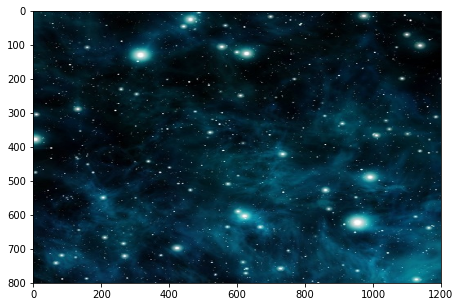

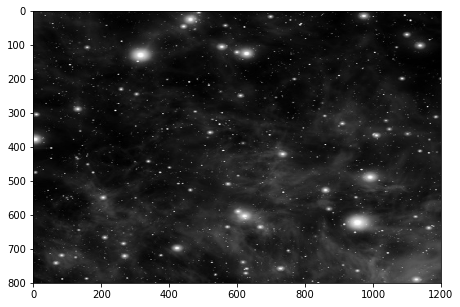

In [4]:
img = load_img(Im1)
imgbn = load_img_bn(Im1)

A continuación, vamos a realizar una apertura para poder eliminar ruido del background. Para ello, hacemos una erosión y luego una dilatación en la imagen con el mismo bloque estructural (SE).
Comenzamos realizando una erosión a la imagen y viendo su correcto funcionamiento.

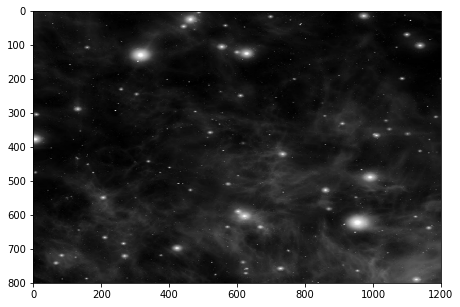

In [5]:
se = np.ones((3,3))
erosion = cv2.erode(imgbn, se, iterations=1)

show_img_bn(erosion)

Ahora realizamos una dilatación a la imagen y comprobamos que funciona correctamente.

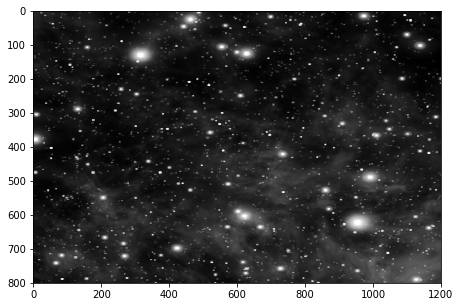

In [6]:
dilatacion = cv2.dilate(imgbn, se, iterations=1)
show_img_bn(dilatacion)

##### 3 Funciones auxiliares
En este apartado se definen una serie de funciones necesarias para el correcto funcionamiento del código de la actividad.  

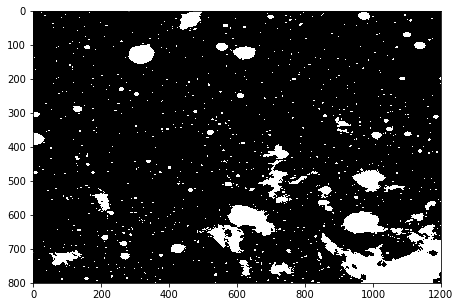

In [7]:
def apertura(img, se, iterations):
    """
    Función que realiza la apertura
    """
    erosion = cv2.erode(img, se, iterations=iterations)
    dilatacion = cv2.dilate(erosion, se, iterations=iterations)
    
    return dilatacion

def Reverse(lst):
    """
    Esta función devuelve la lista pasada por parámetro ordenada de al revés, para optimizar
    la búsqueda del valor máximo.
    """
    return [ele for ele in reversed(lst)] 

def binarize(img,per):
    """
    Función que binariza la imagen en base al eprcentil recibido por parámetro"""
    threshold=np.percentile(img.ravel(),per)
    ret,thresh = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    return thresh  
show_img_bn(binarize(imgbn, 90))

##### 4 Función principal

A continuación proporcionamos nuestra solución al problema. Para ello necesitamos eliminar ruido
de la imagen realizando una apertura, binarizar o umbralizar la imagen y, finalmente, contar las estrellas.  

Entonces comenzamos definiendo una función que realice la apertura de la imagen tomando tres parámetros, la imagen,
el bloque estructural a utilizar y las iteraciones que van a ser realizadas. Entre más iteraciones se realizan más contenido se eliminará.  

Para binarizar la imagen creamos una función que recibe la imagen y el percentil a aplicar.  

El funcionamiento del algoritmo consiste en binarizar la imagen a tratar, posteriormente realizar una apertura que nos permite prescindir de estrellas que puedan ser consideradas como ruido. Una vez se ha eliminado este ruido, y con la imagen umbralizada, aplicamos la transformación de Canny porque, al estar la imagen umbralizada, nos devuelve los contornos cerrados de las estrellas a contar. Este punto es importante ya que los contornos cerrados nos van a permitir dibujar más fácilmente los bordes de las estrellas.  
Como ya hemos comentado, con la transformación de Canny realizada buscamos lso contornos cerrados de las estrellas y los contamos para indicar el número de estrellas visualizadas en la imagen. Por último se pintan los contornos de las estrellas en la imagen original de modo que se obtenga una mejor visualización del conteo.  

El algoritmo lo ejecutamos de forma que obtengamos resultados para diferentes perceptiles e iteraciones, y así obtener las conclusiones de su funcionamiento.  

In [8]:
def conteo_estrellas(file,se,iterations,percentile):
    """
    Esta función realiza el proceso descrito anteriormente, es decir, una apertura, una umbralización, la transformación
    de Canny, el conteo de contornos de estrellas y su dibujo en la imagen original.
    """
    pimg=load_img(file,resize=False,show=False)
    img=load_img_bn(file,resize=False,show=False)
    
    binar = binarize(img,percentile)
    
    aper = apertura(binar,se,iterations)
    
    canny = cv2.Canny(aper,100,200)
    
    (contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contornos

##### 5 Definición y visualización de ejemplos
En este apartado se muestran las imagenes de ejemplo con distintos niveles de parametrización, con el finde exponer el potencial de la función de detección.

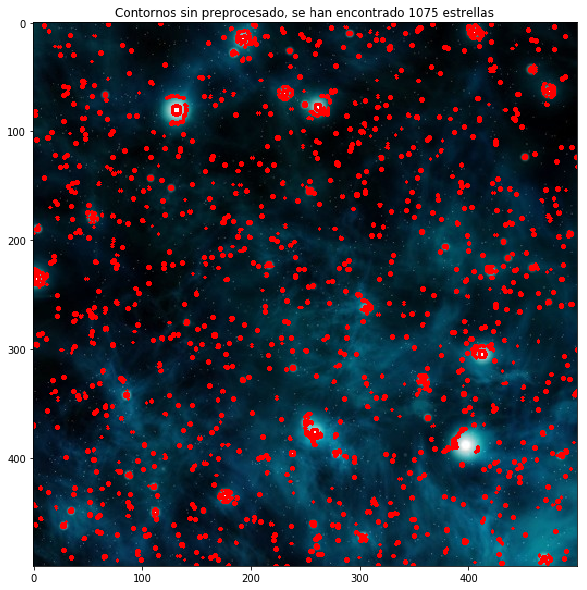

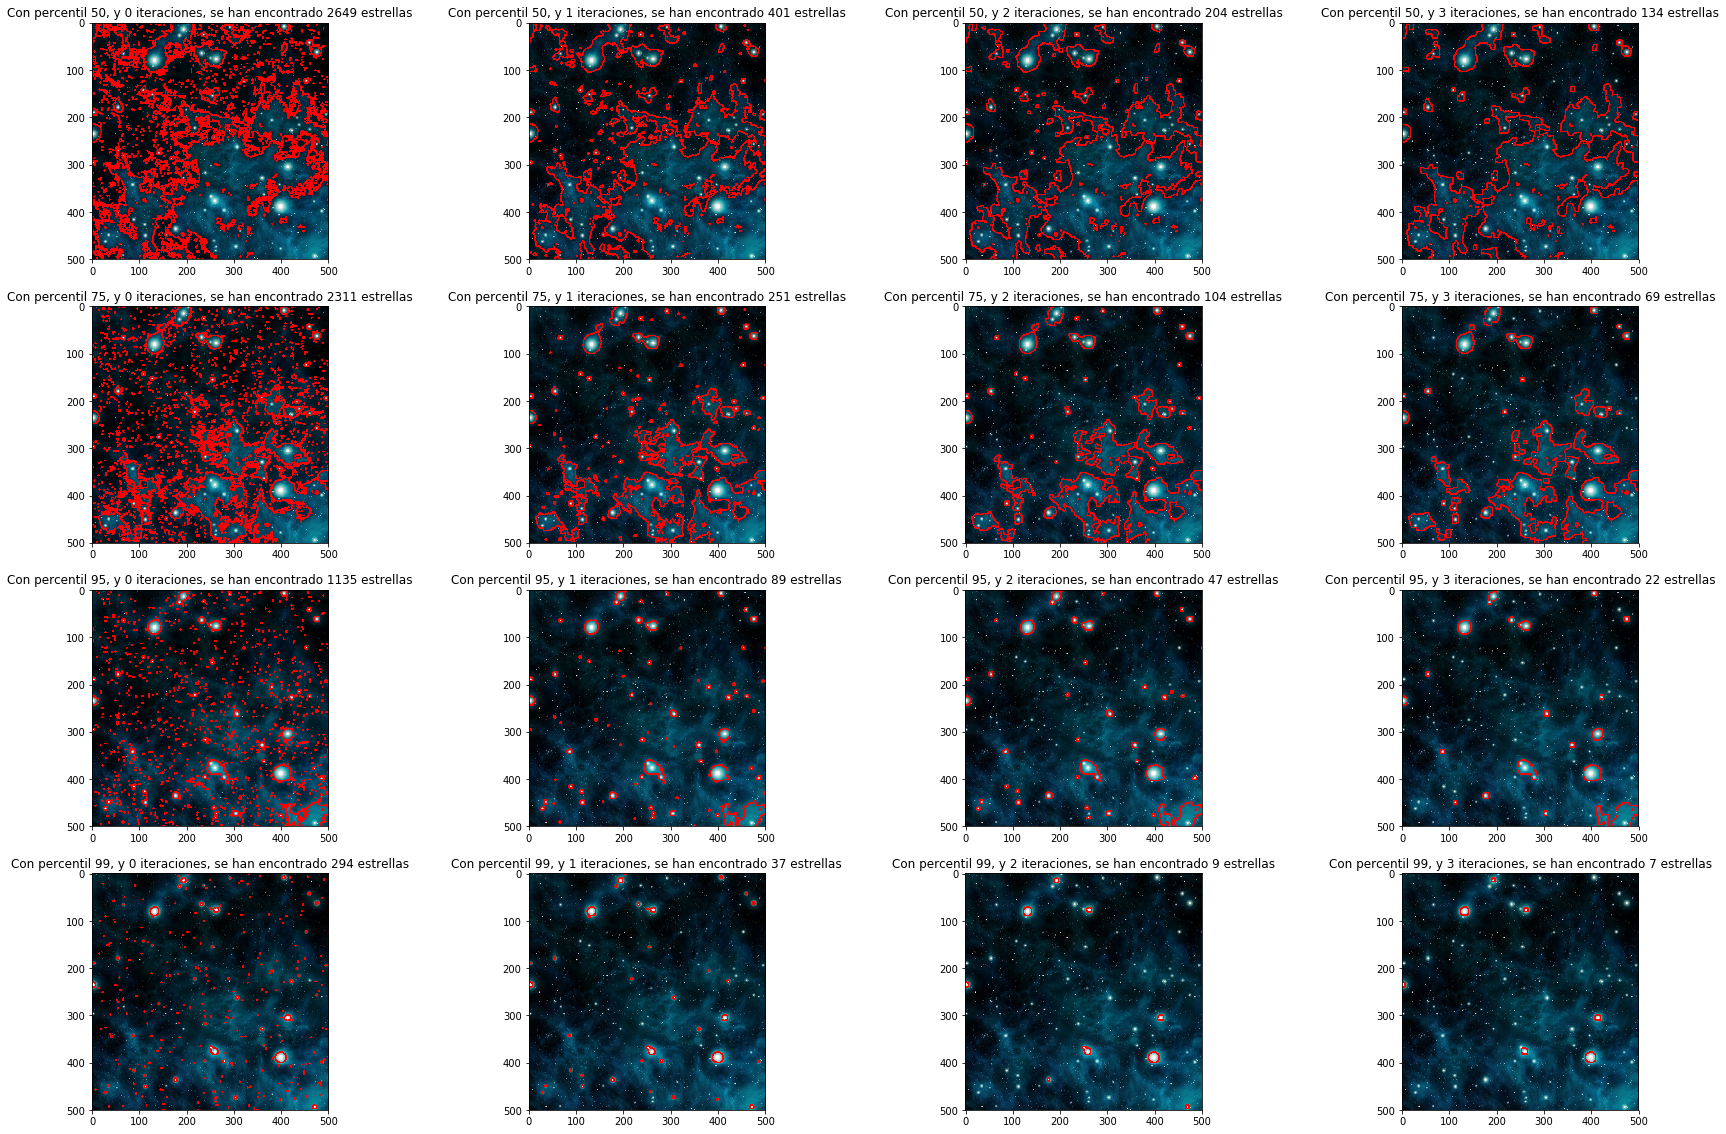

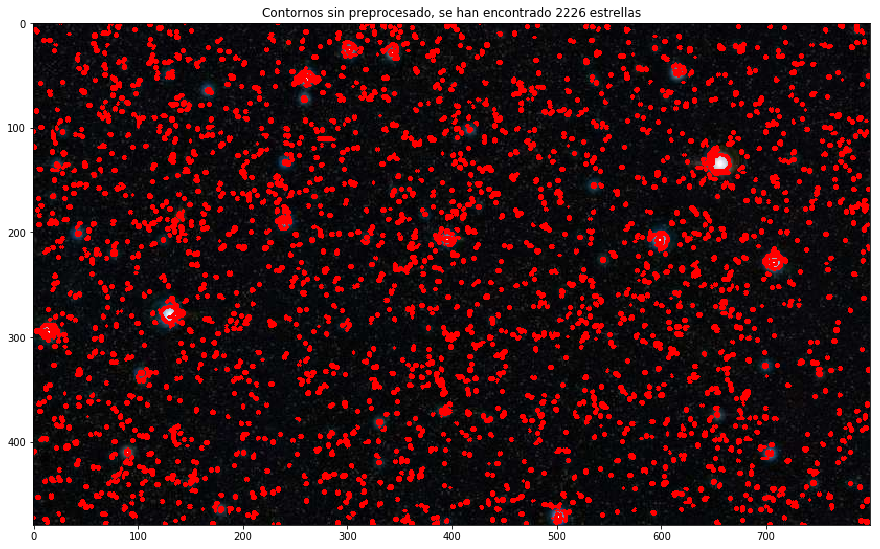

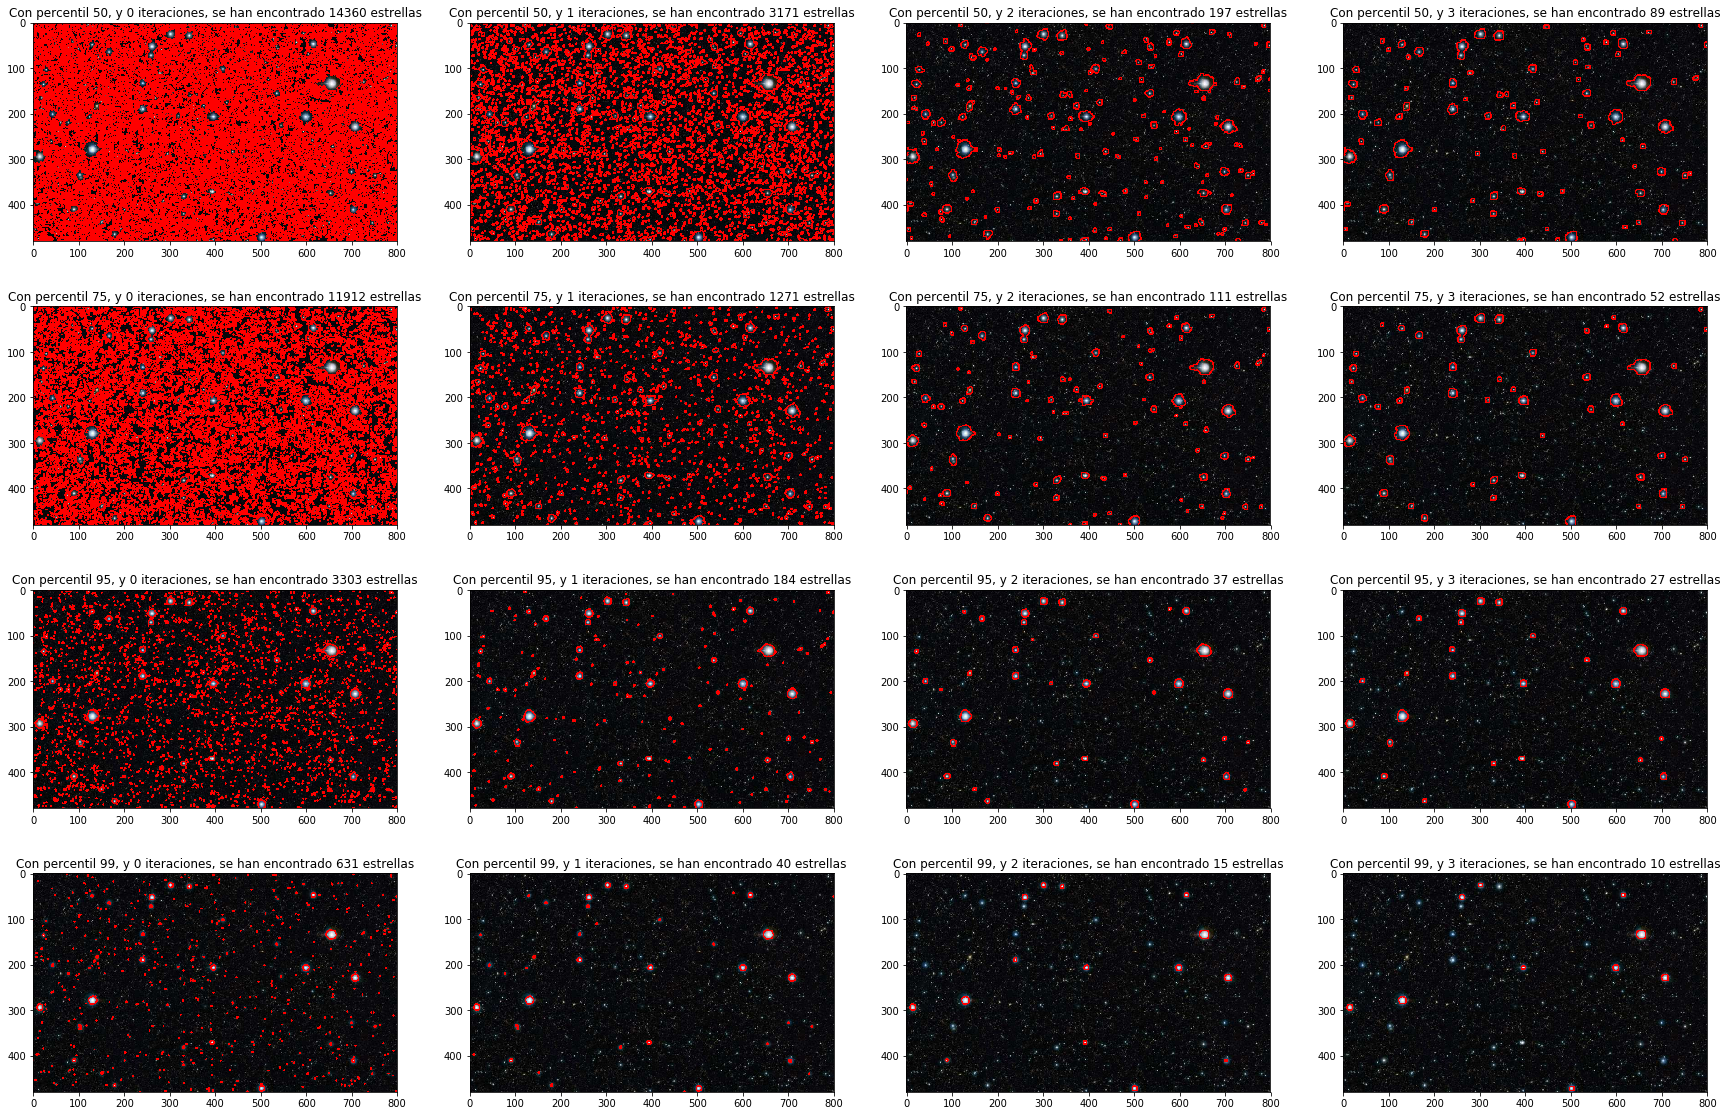

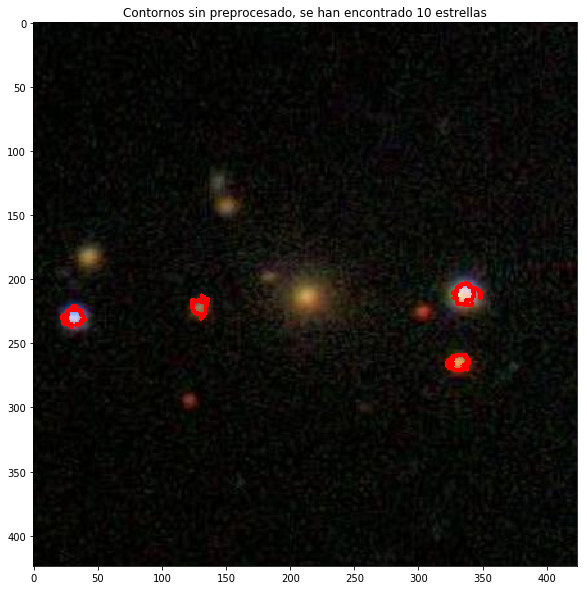

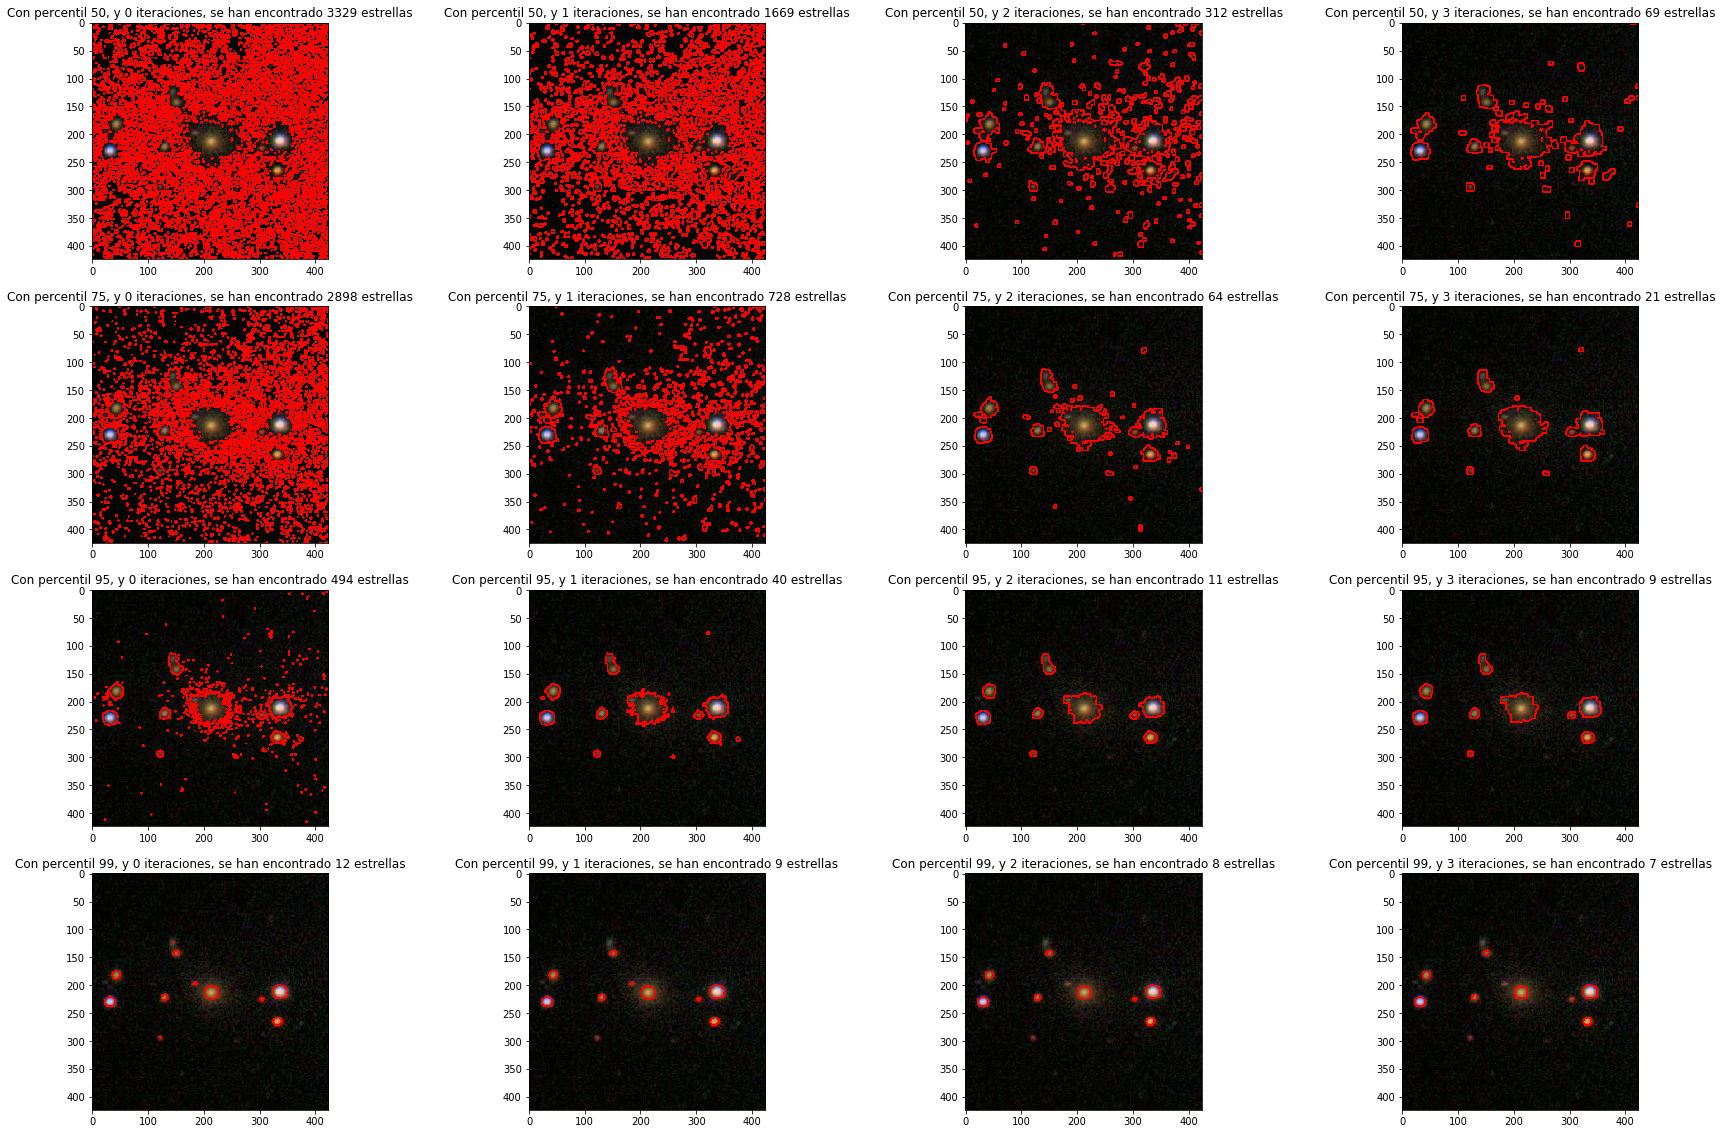

In [9]:
def analyze(img,se):
    """
    Función que devuelve los resultados del algoritmo en base a diferentes parámetros
    """
    percentiles=[50,75,95,99] #lista de percentiles
    iteraciones=[0,1,2,3]     #lista de iteraciones
    
    fig,ax = plt.subplots(len(percentiles),len(iteraciones),figsize=(30,20)) #matriz de imagenes
    
    for per,i in zip(percentiles,range(len(percentiles))):    #iteracion sobre los percentiles
        for it,j in zip(iteraciones,range(len(iteraciones))): #iteracion sobre el numero de iteraciones
            
            cont = conteo_estrellas(img,se,it,per)         
            #funcion principal del algoritmo, sobre img1 con "se" elemento estructural, "it" iteraciones  y "per" percentil
            #devuelve una lista con los contornos encontrados
            
            pimg=load_img(img,resize=False,show=False)  #cargamos la imagen original para pintar sobre ella
            cv2.drawContours(pimg,cont,-1,(255,0,0), 2) #dibujamos los contornos
            ax[i,j].set_title('Con percentil {}, y {} iteraciones, se han encontrado {} estrellas'.format(per,it,len(cont)))
            ax[i,j].imshow(pimg) #dibujamos la imagen

def conteo_estrellas_base(file,se):
    """
    Función que dibuja en la imagen original los contornos de referencia de las estrellas contadas.
    """
    
    img=load_img_bn(file,resize=False,show=False) #cargamos la imagen en blanco y negro
    
    canny = cv2.Canny(img,100,200)  #creamos bordes con el alg de canny
    
    (contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #detectamos los bordes
    
    #representamos los bordes sobre la imagen original
    fig,ax = plt.subplots(figsize=(15,10))
    pimg=load_img(file,resize=False,show=False)  #cargamos la imagen original para pintar sobre ella
    cv2.drawContours(pimg,contornos,-1,(255,0,0), 2) #dibujamos los contornos
    ax.set_title("Contornos sin preprocesado, se han encontrado {} estrellas".format(len(contornos)))
    ax.imshow(pimg) #dibujamos la imagen
    return contornos
            
se = np.ones((3,3))

img = Im1
cont=conteo_estrellas_base(img,se)
analyze(img,se)
img = Im2
cont=conteo_estrellas_base(img,se)
analyze(img,se)
img = Im3
cont=conteo_estrellas_base(img,se)
analyze(img,se)

#####  6 Análisis
Para elegir la mejor transformación de la imagen se han procesado las imágenes varias veces con diferentes percentiles e iteraciones para poder proporcionar varias opciones y así elegir según el criterio del estudio.  
En el caso de la primera imagen, nos quedamos con la solución proporcionada por el percentil 95 y 1 iteración.  
En la segunda imagen, elegimos el resultado de un percentil 95 y 3 iteraciones.  
Para la última, la imagen generada con un percentil del 99 y 1 iteración nos ofrece el mejor resultado.  

##### 7 Conclusiones

Las imágenes con las estrellas resaltadas dependen de dos variables numéricas: el percentil que describe que grado de binarización se asigna a la imagen y las iteraciones que son la cantidad de veces que se ha aplicado la función morfológica sobre la imagen.  

Con el objetivo de detectar y contar los objetos celestes que más destacan en cada imagen ajustamos estos parámetros buscando eliminar el ruido de fondo que se compone tanto de las estrellas no tan notables para el caso de estudio como de otro tipo de granulado provocado por el propio sensor.  

Un grado de binarización elevado elimina de la imagen los elementos demasiado pequeños para que sean destacables y baja el número de iteraciones de apertura necesarios para el resultado óptimo, el valor entre el 80-90% con 2 iteraciones da los mejores resultados, con más iteraciones se podría borrar datos que si son interesantes. Con un percentil bajo (<80%) se consigue llegar a resultados similares iterando de 3 a 5 veces sobre la imagen. Con un percentil demasiado elevado (>90%) la pérdida de información no compensa el bajo número de iteraciones ya que los resultados no son buenos.  